# Objetivo

Temos um conjunto de 128 nós dispostos, em uma região $400m \times 400m$, via distribuição de probabilidade uniforme. Inicialmente, fixamos um conjunto de nós e comparamos resultados de performance da clusterização, via K-means, com  N = 3, 4.

In [1]:
#from numpy.random import uniform
#from numpy.random import choice

#importando os pacotes básicos
import numpy as np   # um pacote para vetorização dos dados
import matplotlib.pyplot as plt # um pacote para realizar graficos/plotagem
import pandas as pd #um pacote para tornar os dados tabulares
import seaborn as sns #um pacote para realizar graficos mais sofisticados

In [2]:
#importando o recurso para controlar a geração dos pseudo-numeros aleatórios
#um recurso para criar sementes e torna o sorteio de dados reprodutivel
from numpy.random import default_rng

In [3]:
# definindo a semente que irá controlar a geração de pseudo-aletórios, para garantir a reprodutibilidade dos resultados e comparações
gera = default_rng(seed = 24)

## colocar numero de divisões do grid e N_cluster em um pipeline !!

In [4]:
# lado da área do experimento
L = 200

# numero de nós
N_node = 140


# numero de partições do grid
N_grid = np.array([3,2])


# numero de clusters 
N_cluster = N_grid.prod()

#numero de realizações
N_realiz = 100

# gerando as coordenadas dos 128 nós
# usamos a função uniform do pacote numpy para gerar dados aleatórios com distribuição uniforme
coord_nos = gera.uniform(0,L, size=(N_node,2,N_realiz)) 



In [5]:
# criando a tabela com as coordenadas dos 128 nós
# utilizamos um recurso do pacote pandas

df_kmeans = [pd.DataFrame({'x':coord_nos[:,0,i],'y':coord_nos[:,1,i]}) for i in range(N_realiz)]
df_grid = [pd.DataFrame({'x':coord_nos[:,0,i],'y':coord_nos[:,1,i]}) for i in range(N_realiz)]

# FEITO!!!
# fazer várias realizações de uma distribuição uniforme!!!!

# A FAZER!!!
### medir a variabilidade e valor esperados da eficiencia energetica e capacadidade do canal
### e discutir a proposta em função da análise estatística

In [6]:
#importando o método de clusterização 
from sklearn.cluster import KMeans



# A FAZER!!
## ao escrever o artigo, detalhar os parametros das funções e classes usadas. Por exemplo, detalhar o n_init do KMeans

In [7]:
# criando uma lista de objetos da classe de clusterização para cada realização
kmeans = [KMeans(n_clusters=N_cluster, n_init=20) for i in range(N_realiz)] #instanciando a classe que contém o algoritmo Kmeans


In [8]:
# a lista das predições para cada realização
y_pred = [kmeans[i].fit_predict(df_kmeans[i][['x','y']]) for i in range(N_realiz)] #as predições de cada nó segundo o Kmeans 

In [9]:
# criando uma coluna com o rótulo da clusterização 
for i in range(N_realiz):
    df_kmeans[i]['label'] = y_pred[i]


In [10]:
df_kmeans[1]

,x,y,label
0,81.035463,28.753966,2
1,173.280742,163.853854,1
2,99.099921,170.318193,5
3,170.542869,66.399298,4
4,0.447603,9.882703,2
...,...,...,...
135,2.676738,167.621575,5
136,193.678915,17.273891,4
137,91.607456,104.484559,0
138,140.421254,128.016337,1


In [11]:
# importando a classe OrdinalEncoder para simplificar os rótulos do "metodo grid"
from sklearn.preprocessing import OrdinalEncoder

In [12]:
# criando o objeto da classe OrdinalEncoder
encode = OrdinalEncoder()

In [13]:
gride_code = [np.int32(np.ceil(df_grid[i][["x","y"]]*(N_grid/L))).astype(str) for i in range(N_realiz)]
gride_code[0]

array([['1', '2'],
       ['1', '1'],
       ['2', '1'],
       ['3', '1'],
       ['1', '2'],
       ['1', '2'],
       ['1', '2'],
       ['2', '2'],
       ['2', '1'],
       ['2', '2'],
       ['2', '1'],
       ['3', '1'],
       ['3', '2'],
       ['2', '2'],
       ['1', '1'],
       ['2', '2'],
       ['3', '2'],
       ['3', '2'],
       ['3', '1'],
       ['1', '2'],
       ['1', '1'],
       ['3', '1'],
       ['1', '1'],
       ['1', '1'],
       ['3', '1'],
       ['3', '2'],
       ['2', '2'],
       ['2', '2'],
       ['3', '1'],
       ['3', '2'],
       ['1', '2'],
       ['2', '2'],
       ['2', '2'],
       ['1', '1'],
       ['1', '2'],
       ['1', '2'],
       ['3', '2'],
       ['1', '1'],
       ['1', '1'],
       ['3', '2'],
       ['2', '2'],
       ['2', '2'],
       ['1', '2'],
       ['3', '1'],
       ['3', '2'],
       ['2', '1'],
       ['2', '2'],
       ['1', '1'],
       ['1', '1'],
       ['1', '2'],
       ['2', '2'],
       ['2', '2'],
       ['3',

In [14]:
for j in range(N_realiz):
    df_grid[j]['label'] = [''.join(gride_code[j].tolist()[i]) for i in range(N_node)]

df_grid[1]

,x,y,label
0,81.035463,28.753966,21
1,173.280742,163.853854,32
2,99.099921,170.318193,22
3,170.542869,66.399298,31
4,0.447603,9.882703,11
...,...,...,...
135,2.676738,167.621575,12
136,193.678915,17.273891,31
137,91.607456,104.484559,22
138,140.421254,128.016337,32


In [15]:
for j in range(N_realiz):
    df_grid[j]['label'] = encode.fit_transform(np.array(df_grid[j]['label']).reshape(-1,1)).astype(int)

df_grid[1]

,x,y,label
0,81.035463,28.753966,2
1,173.280742,163.853854,5
2,99.099921,170.318193,3
3,170.542869,66.399298,4
4,0.447603,9.882703,0
...,...,...,...
135,2.676738,167.621575,1
136,193.678915,17.273891,4
137,91.607456,104.484559,3
138,140.421254,128.016337,5


# A FAZER!!
## melhorar o visual e apresentação dos gráficos!!

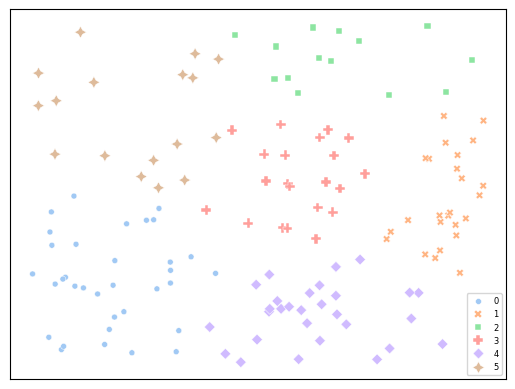

In [16]:
sns.scatterplot(data = df_kmeans[4], x = 'x', y = 'y', hue = 'label', style = 'label', size= 'label', palette=sns.color_palette("pastel",N_cluster))
plt.legend(fontsize = 6)
plt.xticks([], [])
plt.yticks([],[])
plt.xlabel("")
plt.ylabel("")
plt.savefig('kmeans_example.png', bbox_inches='tight')

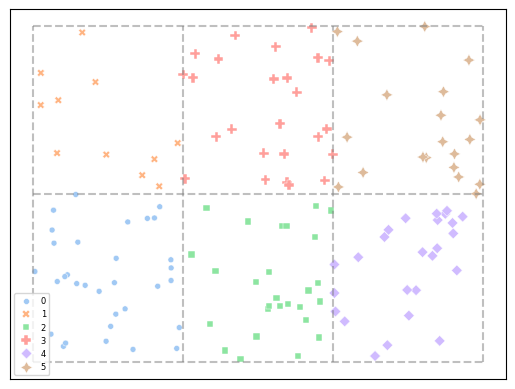

In [27]:
sns.scatterplot(data = df_grid[4], x = 'x', y = 'y', hue = 'label' , style = 'label', size= 'label', palette=sns.color_palette("pastel",N_cluster))
plt.hlines(100,0,200,linestyles='dashed',colors='grey', alpha= 0.5)
plt.hlines(0,0,200,linestyles='dashed',colors='grey', alpha= 0.5)
plt.hlines(200,0,200,linestyles='dashed',colors='grey', alpha= 0.5)
plt.vlines(66.66,0, 200,linestyles='dashed',color='grey', alpha = 0.5)
plt.vlines(133.33,0 , 200,linestyles='dashed',color = 'grey', alpha = 0.5)
plt.vlines(0,0, 200,linestyles='dashed',color='grey', alpha = 0.5)
plt.vlines(200,0, 200,linestyles='dashed',color='grey', alpha = 0.5)
plt.legend(fontsize=6)
plt.xticks([], [])
plt.yticks([],[])
plt.xlabel("")
plt.ylabel("")
plt.savefig('grid_example.png', bbox_inches='tight')

In [ ]:
# usando o atributo cluster_centers_ para obter as coordenadas dos centroides
centroid_kmeans = [kmeans[i].cluster_centers_ for i in range(N_realiz)]
centroid_kmeans

In [ ]:
# indice dos rotulos de cada particão
grid_index =[np.array([[i,j]for i in range(1,N_grid[0]+1)for j in range(1,N_grid[1]+1)])for k in range(N_realiz)]
        
        

In [ ]:
grid_index

In [ ]:
centroid_grid = [(grid_index[i] - 0.5) * (L/N_grid) for i in range(N_realiz)]

In [ ]:
# calculando a distancia do centroide ao nó para cada realização
for i in range(N_realiz):
    dif = np.linalg.norm(centroid_kmeans[i][df_kmeans[i]['label']]- np.array(df_kmeans[i][['x','y']]), axis = 1)
    df_kmeans[i]['c_to_node'] = dif

In [ ]:
df_kmeans[4]

In [ ]:
# calculando a distancia do centroide ao nó para cada realização
for i in range(N_realiz):
    dif = np.linalg.norm(centroid_grid[i][df_grid[i]['label']]- np.array(df_grid[i][['x','y']]), axis = 1)
    df_grid[i]['c_to_node'] = dif

In [ ]:
df_grid[4]

In [ ]:
for i in range(N_realiz):
    df_kmeans[i]['x_centroid']=centroid_kmeans[i][df_kmeans[i]['label']][:,0]
    df_kmeans[i]['y_centroid']=centroid_kmeans[i][df_kmeans[i]['label']][:,1]

In [ ]:
for i in range(N_realiz):
    df_grid[i]['x_centroid']=centroid_grid[i][df_grid[i]['label']][:,0]
    df_grid[i]['y_centroid']=centroid_grid[i][df_grid[i]['label']][:,1]

In [ ]:
df_kmeans[3]

In [ ]:
df_grid[3]

In [ ]:
### encontrando os índices dos nós mais próximos

In [ ]:
indice_kmeans = [[df_kmeans[j][df_kmeans[j]['label'] == i]['c_to_node'].idxmin() for i in range(N_cluster)] for j in range(N_realiz)]

In [ ]:
indice_grid = [[df_grid[j][df_grid[j]['label'] == i]['c_to_node'].idxmin() for i in range(N_cluster)] for j in range(N_realiz)]

In [ ]:
indice_kmeans

### criando data frames para cada realização e cluster

In [ ]:
df_rc_kmeans = [[df_kmeans[j][df_kmeans[j]['label']==i] for i in range(N_cluster)] for j in range(N_realiz)]
df_rc_grid = [[df_grid[j][df_grid[j]['label']==i] for i in range(N_cluster)] for j in range(N_realiz)]

In [ ]:
# realização = 33 (trigesima quarta realização)
# cluster = 3 (quarto cluster)
df_rc_grid[33][3]

In [ ]:
# inserindo colunas das coordenadas do head nos DFs para cada realização e cada cluster
for j in range(N_realiz):
    for i in range(N_cluster):
            df_rc_kmeans[j][i]['x_head'] = df_rc_kmeans[j][i].loc[indice_kmeans[j][i]][0]
            df_rc_kmeans[j][i]['y_head'] = df_rc_kmeans[j][i].loc[indice_kmeans[j][i]][1]

In [ ]:
# inserindo colunas das coordenadas do head nos DFs para cada realização e cada cluster
for j in range(N_realiz):
    for i in range(N_cluster):
            df_rc_grid[j][i]['x_head'] = df_rc_grid[j][i].loc[indice_grid[j][i]][0]
            df_rc_grid[j][i]['y_head'] = df_rc_grid[j][i].loc[indice_grid[j][i]][1]

In [ ]:
df_rc_kmeans[0][1]

In [ ]:
df_rc_grid[0][1]

In [ ]:
for j in range(N_realiz):
    for i in range(N_cluster):
        dif_k = np.array(df_rc_kmeans[j][i][['x_head','y_head']])- np.array(df_rc_kmeans[j][i][['x','y']])
        df_rc_kmeans[j][i]['h_to_node'] = np.linalg.norm(dif_k, axis = 1)
        dif_g = np.array(df_rc_grid[j][i][['x_head','y_head']])- np.array(df_rc_grid[j][i][['x','y']])
        df_rc_grid[j][i]['h_to_node'] = np.linalg.norm(dif_g, axis = 1)

In [ ]:
df_rc_grid[0][1]

vamos fazer uma analise de valor médio das colunas "c_to_node" e "h_to_node". Entretanto, vamos desconsiderar a linha do proprio head node.

In [ ]:
df_rc_kmeans_no_head = [[df_rc_kmeans[j][i][df_rc_kmeans[j][i]['x'] != df_rc_kmeans[j][i].loc[indice_kmeans[j][i]][0]] for i in range(N_cluster)] for j in range(N_realiz)]

In [ ]:
df_rc_kmeans_heads = [[df_rc_kmeans[j][i][df_rc_kmeans[j][i]['x'] == df_rc_kmeans[j][i].loc[indice_kmeans[j][i]][0]] for i in range(N_cluster)] for j in range(N_realiz)]

In [ ]:
df_rc_kmeans_heads[66][1]

In [ ]:
#adicionando uma coluna p/ distancia head to sink

obj_kmeans = [KMeans(n_clusters=1, n_init=20) for i in range(N_realiz)]


In [ ]:
len(df_rc_kmeans_heads)

In [ ]:
[df_rc_kmeans_heads[0][j][['x','y']] for j in range(N_cluster)]

In [ ]:
ateste = [np.array([df_rc_kmeans_heads[i][j][['x','y']] for j in range(N_cluster)]) for i in range(N_realiz)]
for i in range(N_realiz):
    obj_kmeans[i].fit(ateste[i].reshape(N_cluster,-1))

In [ ]:
sinks = [obj_kmeans[i].cluster_centers_ for i in range(N_realiz)]

In [ ]:
len(sinks)

In [ ]:
sinks_np = np.array(sinks)
sinks_np.reshape(100,-1)

In [ ]:
sinks[0].reshape(-1).shape, np.array([1.,1.]).shape

In [ ]:
data_df = pd.DataFrame([3, 1, 2, 4], index=['a', 'b', 'c', 'd']).transpose()
data_df

In [ ]:
points_df = pd.DataFrame([3.5, 0.5, 1.75, 4.25], index=['a', 'b', 'c', 'd']).transpose()

plt.figure()
sns.barplot(data=data_df)
sns.scatterplot(data=points_df.T, legend=False, zorder=10)

In [ ]:
sink_corner = False

if sink_corner:
    for j in range(N_realiz):
        for i in range(N_cluster):
            dife_k = np.array(df_rc_kmeans_heads[j][i][['x_head','y_head']])- np.array([L,L])
            df_rc_kmeans_heads[j][i]['h_to_sink'] = np.linalg.norm(dife_k, axis = 1)
else:
    
    for j in range(N_realiz):
        for i in range(N_cluster):
            dife_k = np.array(df_rc_kmeans_heads[j][i][['x_head','y_head']])- sinks[j]
            df_rc_kmeans_heads[j][i]['h_to_sink'] = np.linalg.norm(dife_k, axis = 1)

In [ ]:
df_rc_grid_no_head = [[df_rc_grid[j][i][df_rc_grid[j][i]['x'] != df_rc_grid[j][i].loc[indice_grid[j][i]][0]] for i in range(N_cluster)] for j in range(N_realiz)]

In [ ]:
df_rc_grid_heads = [[df_rc_grid[j][i][df_rc_grid[j][i]['x'] == df_rc_grid[j][i].loc[indice_grid[j][i]][0]] for i in range(N_cluster)] for j in range(N_realiz)]

In [ ]:
#adicionando uma coluna p/ distancia head to sink

if sink_corner:
    for j in range(N_realiz):
        for i in range(N_cluster):
            dife_g = np.array(df_rc_grid_heads[j][i][['x_head','y_head']])- np.array([L,L])
            df_rc_grid_heads[j][i]['h_to_sink'] = np.linalg.norm(dife_g, axis = 1)
else:
    for j in range(N_realiz):
        for i in range(N_cluster):
            dife_g = np.array(df_rc_grid_heads[j][i][['x_head','y_head']])- np.array([L/2.,L/2.])
            df_rc_grid_heads[j][i]['h_to_sink'] = np.linalg.norm(dife_g, axis = 1)
        

In [ ]:
df_rc_grid_heads[66][3]

In [ ]:
df_rc_kmeans_heads[66][3]

## vamos criar a coluna da potência transmitida

Para tanto, devemos :
* calcular a constante  $k = (\frac{4 \pi}{\lambda})² P_r $, onde $P_r$ é a potência recebida pelo nó head (constante de $-70$ mili decibeis).

* elevar ao quadrado as distâncias (que estão na coluna "h_to_node")



In [ ]:

c = 299792458.0
freq = 2.4 * 10**9
P_r = 0.0000001 # convertendo -70 mili decibeis em mili watt
comprimento = c / freq
k = P_r *((4 * np.pi)/comprimento)**2 

In [ ]:
comprimento , k

In [ ]:
for j in range(N_realiz):
    for i in range(N_cluster):
        df_rc_grid_no_head[j][i]['P_t'] = k * (df_rc_grid_no_head[j][i]['h_to_node']**2)
        df_rc_kmeans_no_head[j][i]['P_t'] = k * (df_rc_kmeans_no_head[j][i]['h_to_node']**2)

In [ ]:
for j in range(N_realiz):
    for i in range(N_cluster):
        df_rc_grid_heads[j][i]['P_t'] = k * (df_rc_grid_heads[j][i]['h_to_sink']**2)
        df_rc_kmeans_heads[j][i]['P_t'] = k * (df_rc_kmeans_heads[j][i]['h_to_sink']**2)

In [ ]:
df_rc_grid_heads[66][3]

In [ ]:
df_rc_grid_no_head[66][3]['P_t'].sum()

# análise das distâncias médias

## soma sobre os nós

In [ ]:

mpath_grid_c_to_n = [[df_rc_grid_no_head[j][i]['c_to_node'].sum() for i in range(N_cluster)]for j in range(N_realiz)] 
mpath_grid_h_to_n = [[df_rc_grid_no_head[j][i]['h_to_node'].sum() for i in range(N_cluster)]for j in range(N_realiz)]

mpath_kmeans_c_to_n = [[df_rc_kmeans_no_head[j][i]['c_to_node'].sum() for i in range(N_cluster)]for j in range(N_realiz)] 
mpath_kmeans_h_to_n = [[df_rc_kmeans_no_head[j][i]['h_to_node'].sum() for i in range(N_cluster)]for j in range(N_realiz)]


In [ ]:
path_grid_c_to_n = pd.DataFrame(mpath_grid_c_to_n,columns=["cg0","cg1","cg2","cg3","cg4","cg5"])

In [ ]:
path_kmeans_c_to_n = pd.DataFrame(mpath_kmeans_c_to_n,columns=["ck0","ck1","ck2","ck3","ck4","ck5"])

In [ ]:
path_grid_h_to_n = pd.DataFrame(mpath_grid_h_to_n,columns=["hg0","hg1","hg2","hg3","hg4","hg5"])

In [ ]:
path_kmeans_h_to_n = pd.DataFrame(mpath_kmeans_h_to_n,columns=["hk0","hk1","hk2","hk3","hk4","hk5"])

In [ ]:

path_kmeans_c_to_n.mean().mean(), path_kmeans_c_to_n.mean().std()

In [ ]:
path_kmeans_c_to_n.mean()

In [ ]:
path_kmeans_c_to_n.mean().hist(), path_grid_c_to_n.mean().hist()

In [ ]:
path_grid_c_to_n.mean().mean(), path_grid_c_to_n.mean().std()

# Análise das distâncias médias

In [ ]:
sns.histplot([path_grid_c_to_n["cg0"],path_kmeans_c_to_n["ck0"]], bins = 50, kde = True)

In [ ]:
sns.histplot([path_grid_h_to_n["hg0"],path_kmeans_h_to_n["hk0"]], bins = 50, kde = True)

In [ ]:
sns.histplot([path_grid_c_to_n["cg0"],path_kmeans_c_to_n["ck0"],path_grid_h_to_n["hg0"],path_kmeans_h_to_n["hk0"]], bins = 50, kde = True)

# análise das potencias médias

## soma sobre os nós

In [ ]:
mpot_grid = [[df_rc_grid_no_head[j][i]['P_t'].sum() for i in range(N_cluster)]for j in range(N_realiz)] 
mpot_kmeans = [[df_rc_kmeans_no_head[j][i]['P_t'].sum() for i in range(N_cluster)]for j in range(N_realiz)]

mpot_grid_sink = [[df_rc_grid_heads[j][i]['P_t'].sum() for i in range(N_cluster)]for j in range(N_realiz)]
mpot_kmeans_sink = [[df_rc_kmeans_heads[j][i]['P_t'].sum() for i in range(N_cluster)]for j in range(N_realiz)]

In [ ]:
pot_grid = pd.DataFrame(mpot_grid,columns=["pg0","pg1","pg2","pg3","pg4","pg5"])

In [ ]:
pot_kmeans = pd.DataFrame(mpot_kmeans,columns=["pk0","pk1","pk2","pk3","pk4","pk5"])

In [ ]:
pot_grid

# Análise das potencias médias

In [ ]:
sns.histplot([pot_grid["pg0"],pot_grid["pg1"],pot_grid["pg2"],pot_grid["pg3"],pot_grid["pg4"],pot_grid['pg5']], bins = 50, kde = True)

In [ ]:
sns.histplot([pot_kmeans["pk0"],pot_kmeans["pk1"],pot_kmeans["pk2"],pot_kmeans["pk3"],pot_kmeans["pk4"],pot_kmeans["pk5"]], bins = 50, kde = True)

In [ ]:
# N_cluster = 6
pot_grid.mean().sum(), pot_kmeans.mean().sum()

## fazer a regressão da lei de eficiência e a lei de comparação de eficiência

In [ ]:
print(pot_grid.mean())
print(pot_kmeans.mean())

In [ ]:
# N_cluster = 4
pot_grid.sum().sum(), pot_kmeans.sum().sum()

# A FAZER!!
## interpretar o overlap conforme N_cluster aumenta!!!

# REFAZER!!!
## calculando a diferença entre valores médios

In [ ]:
"""note que os valores são sempre negativos pois a distancia media centroide-no é 
sempre menor que distancia head-no""" 

#for i in range(N_cluster):
  #  print(df_cluster_no_head[i]['c_to_node'].mean()-df_cluster_no_head[i]['h_to_node'].mean())


In [ ]:
#df_cluster1['c_to_node'].mean()- df_cluster1['h_to_node'].mean(),df_cluster1['c_to_node'].min()

In [ ]:
#df_cluster2['c_to_node'].mean()-df_cluster2['h_to_node'].mean(), df_cluster2['c_to_node'].min()

In [ ]:
#df_cluster3['c_to_node'].mean()-df_cluster3['h_to_node'].mean(), df_cluster3['c_to_node'].min()

In [ ]:
#df_cluster

In [ ]:
#df_cluster0['P_t'] = k * (df_cluster0['h_to_node']**2)
#df_cluster1['P_t'] = k * (df_cluster1['h_to_node']**2)
#df_cluster2['P_t'] = k * (df_cluster2['h_to_node']**2)
#df_cluster3['P_t'] = k * (df_cluster3['h_to_node']**2)

In [ ]:
#df_cluster3

# Gerando gráficos a partir das potencias transmitidas por cada nó

In [ ]:
#for i in range(N_cluster):
   # df_cluster[i].drop(index = indice[i], inplace = True)

In [ ]:
# eliminando o proprio cluster head
#df_cluster0.drop(index = indice_0, inplace = True)
#df_cluster1.drop(index = indice_1, inplace = True)
#df_cluster2.drop(index = indice_2, inplace = True)
#df_cluster3.drop(index = indice_3, inplace = True)

In [ ]:
#df_cluster3

In [ ]:
#df_cluster[0]['P_t'].hist(bins= 10)

In [ ]:
#df_cluster[1]['P_t'].hist(bins= 10)

In [ ]:
#df_cluster[2]['P_t'].hist(bins= 10)

In [ ]:
#df_cluster3['P_t'].hist(bins= 10)

In [ ]:
#pot = [df_cluster[i]['P_t'].sum() for i in range(N_cluster)]

In [ ]:
#pot = df_cluster[0]['P_t'].sum(),df_cluster[1]['P_t'].sum(),df_cluster[2]['P_t'].sum()

### DESCOBRIR UMA REGRA GERAL (a Lei) DE EFICIENCIA ENERGÉTICA!
### ou seja, vamos tentar inferir uma função matemática para a eficiência com a variável N_cluster
### de preferência que seja feita com um algoritmo de aprendizado de maquina de regressão

### além disso podemos adicionar novos dados de entrada para sugerir novas Leis de eficiencia energética. 

In [ ]:
#np.array(pot).sum()

In [ ]:
#plt.bar((0,1,2),pot)